## 🧩 Data Imputation

### Import libraries

In [1]:
#!pip install missingno
import pandas as pd
import missingno as msno

***
#### 📦 Load the Data

A sample dataset of motor vehicle collisions in New York City, including factors such as injury counts, vehicle details, and contributing causes. Commonly used for demonstrating missing data analysis.

Source: https://www.kaggle.com/datasets/nypd/vehicle-collisions 

In [12]:
# Load sample NYC collision dataset
dataset_url = "https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv"
collisions = pd.read_csv(dataset_url)
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,NaN,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",HENRY STREET,WARREN STREET,NaN,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,PASSENGER VEHICLE,VAN,NaN,NaN,NaN
3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,"(40.7192276, -73.8545422)",NaN,NaN,67-64 FLEET STREET,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,"(40.6321467, -73.9527315)",BEDFORD AVENUE,CAMPUS ROAD,NaN,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


### 🔎 1. Identify Missing Data

Display number of missing values per column

In [13]:
collisions.isna().sum()

DATE                                0
TIME                                0
BOROUGH                           383
ZIP CODE                          384
LATITUDE                            0
LONGITUDE                           0
LOCATION                            0
ON STREET NAME                   1065
CROSS STREET NAME                1137
OFF STREET NAME                  6542
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLISTS INJURED       7303
NUMBER OF CYCLISTS KILLED        7303
CONTRIBUTING FACTOR VEHICLE 1       0
CONTRIBUTING FACTOR VEHICLE 2    1085
CONTRIBUTING FACTOR VEHICLE 3    7000
CONTRIBUTING FACTOR VEHICLE 4    7244
CONTRIBUTING FACTOR VEHICLE 5    7289
VEHICLE TYPE CODE 1                58
VEHICLE TYPE CODE 2              1520
VEHICLE TYPE CODE 3              7019
VEHICLE TYPE CODE 4              7249
VEHICLE TYPE CODE 5              7291
dtype: int64

### 📈 Visualize missing data pattern for a random subset of 250 rows

<Axes: >

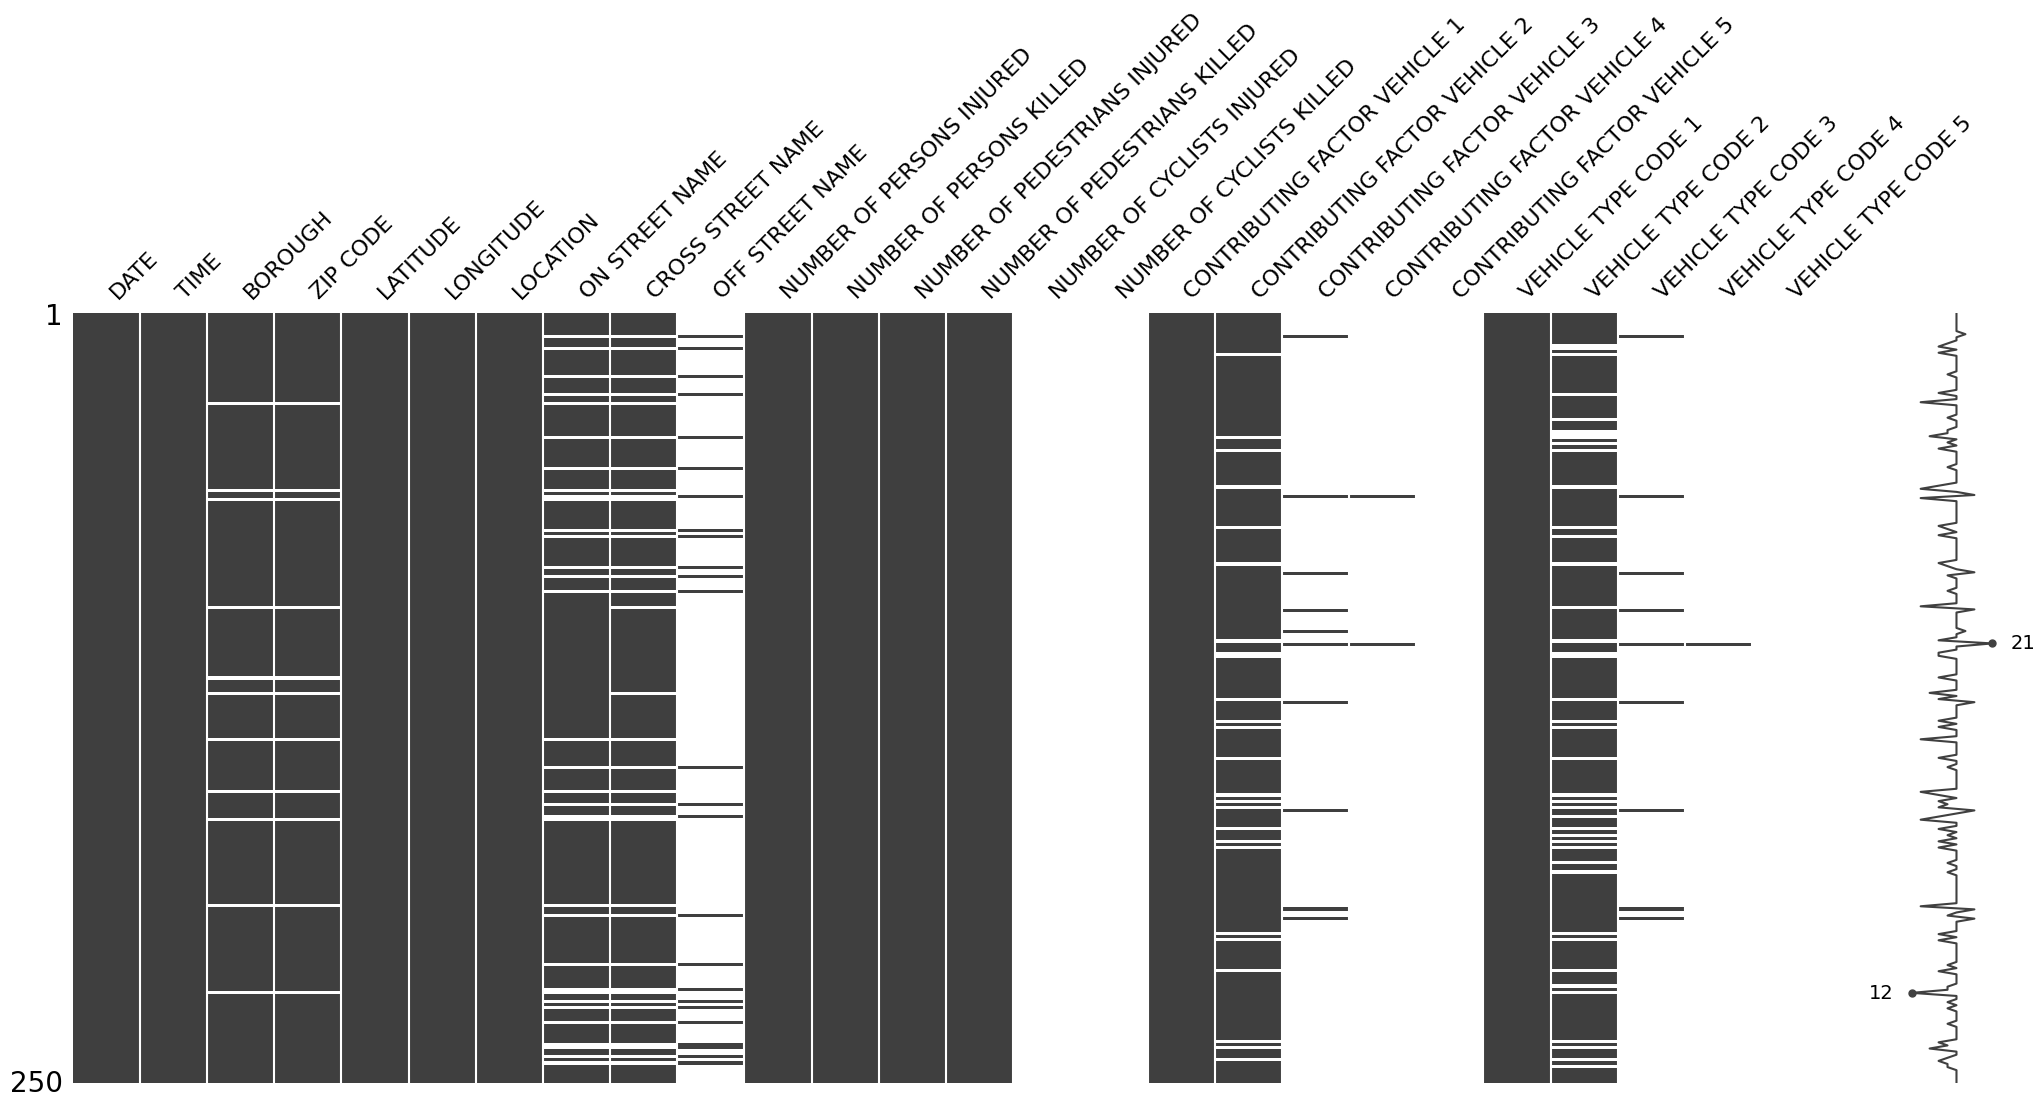

In [14]:
msno.matrix(collisions.sample(250))

#### Nullity correlation

The `missingno` correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

<Axes: >

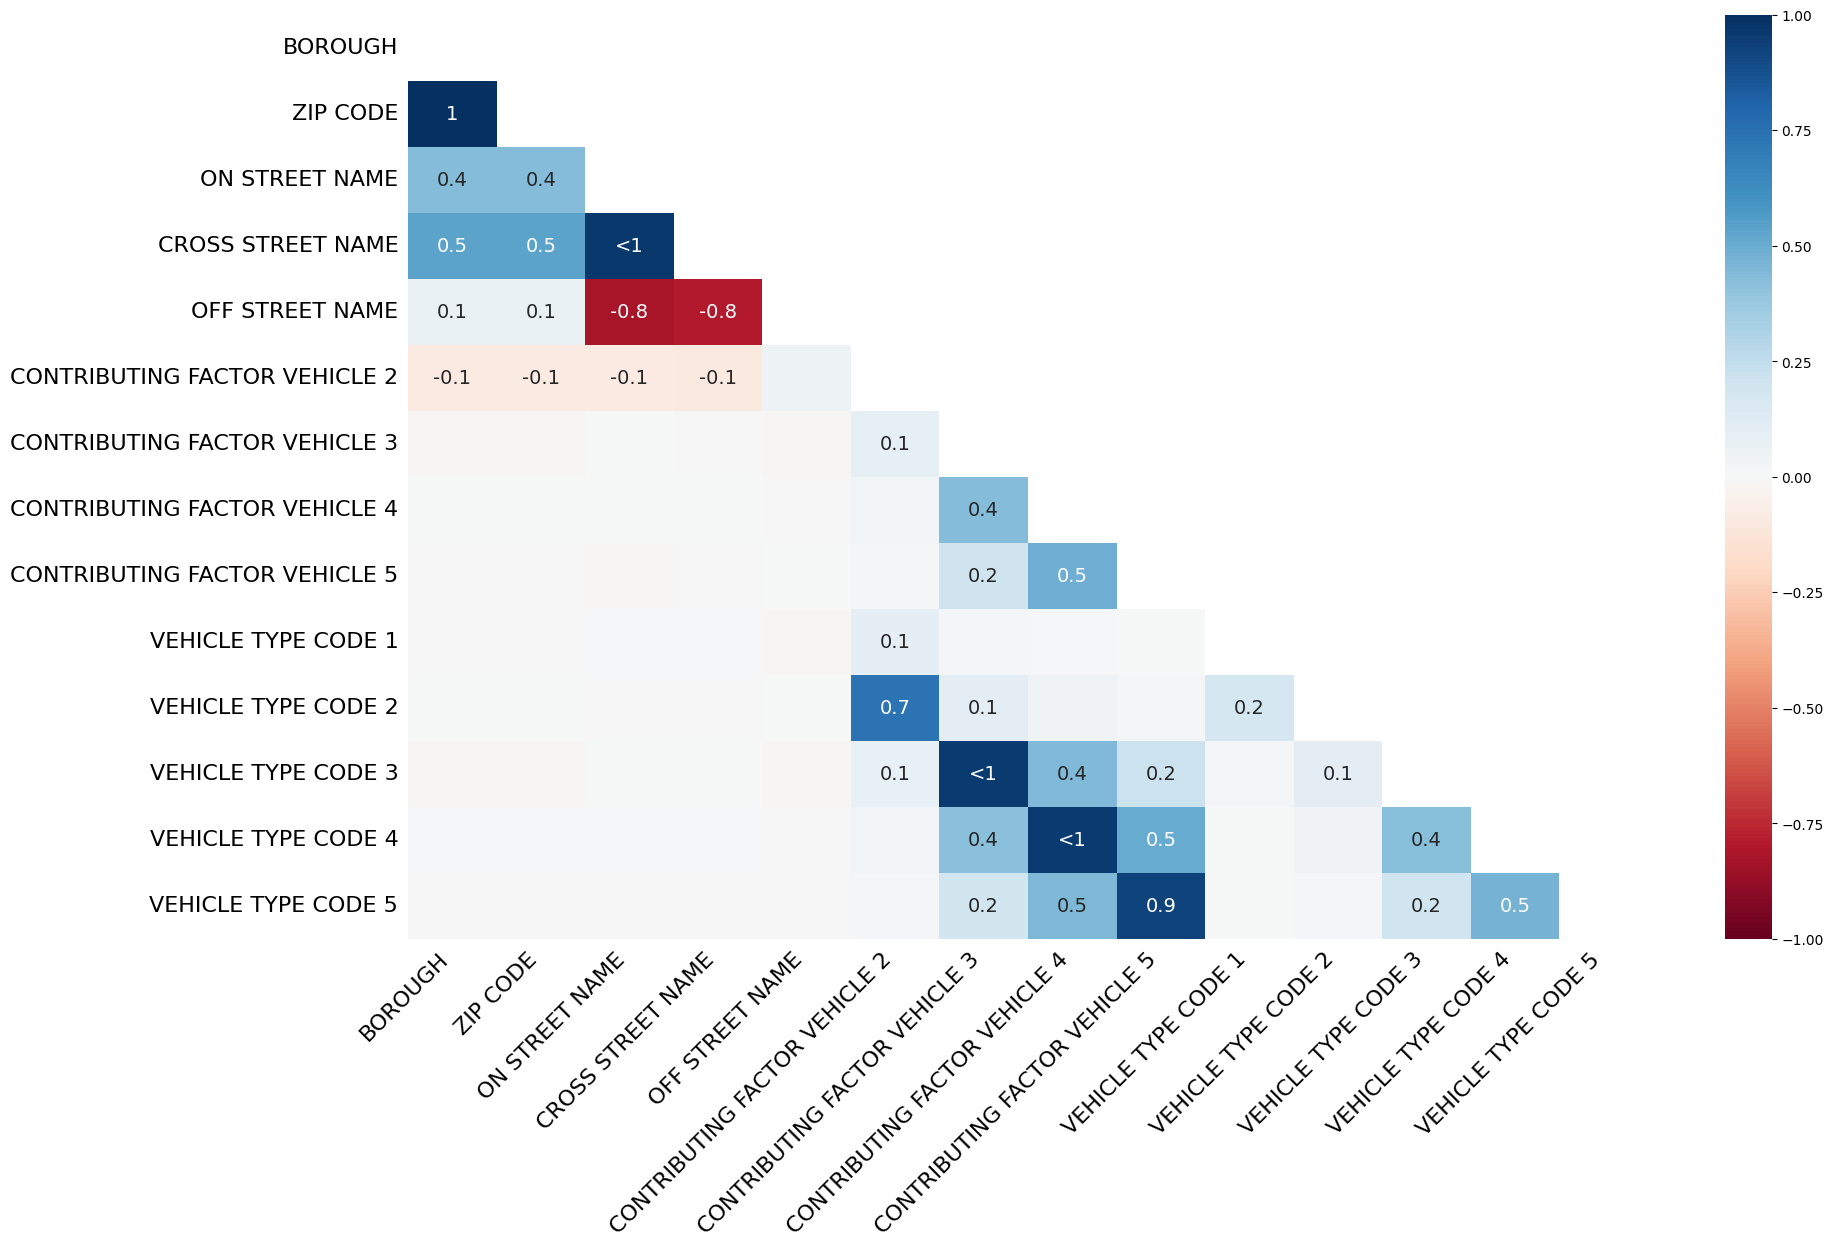

In [16]:
msno.heatmap(collisions)

#### dendrogram 

The `dendrogram` allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

The dendrogram uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation (measured in terms of binary distance.

<Axes: >

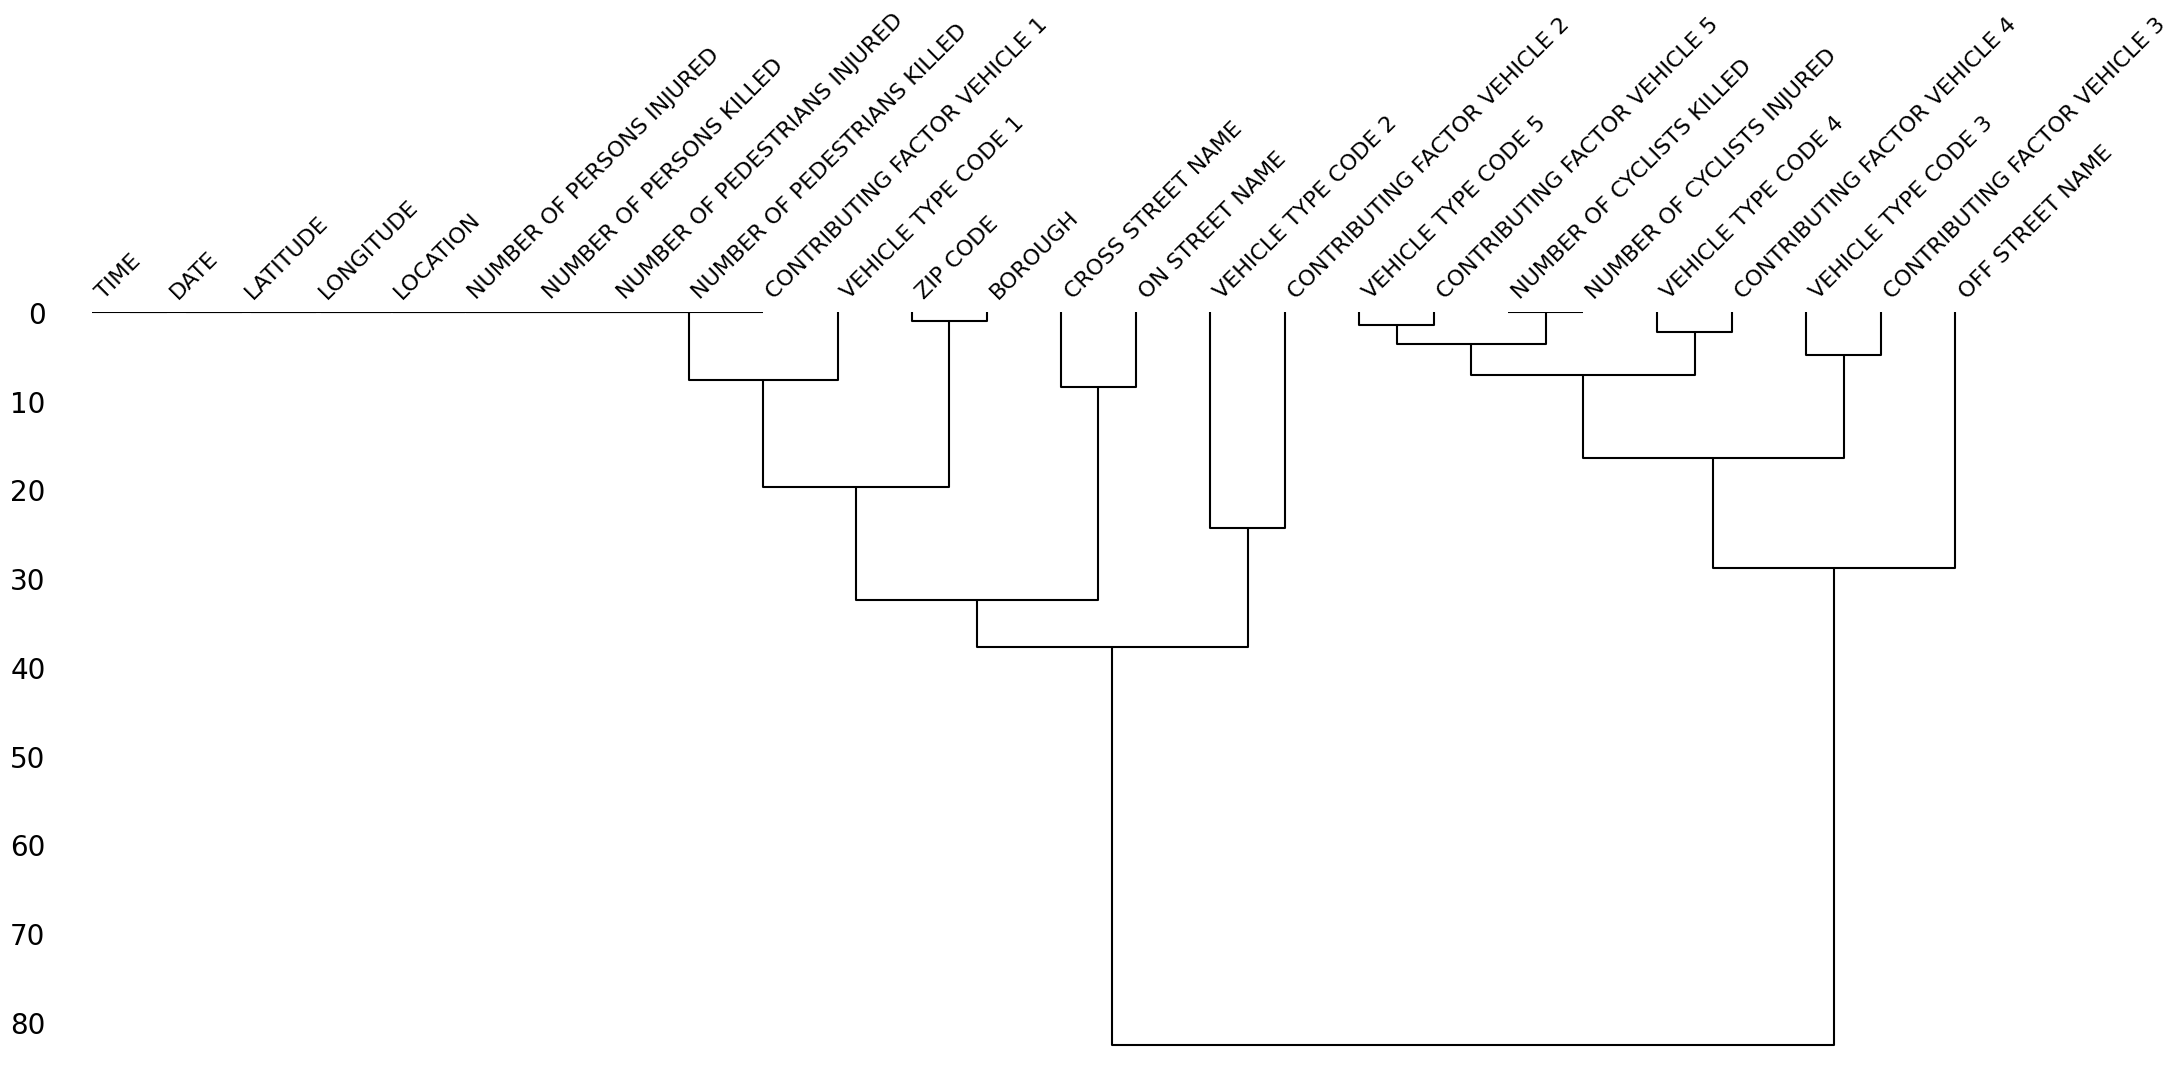

In [17]:
msno.dendrogram(collisions)

### 🛠️ 2. Select an Imputation Strategy
Decide how to handle missing data:
- For **numerical data**, consider using mean, median, or advanced approaches (e.g., KNN, MICE).
- For **categorical data**, use mode or a placeholder value.
- Consider the *missingness mechanism* (MCAR, MAR, MNAR) and the proportion of missing data before selecting a method.

For this demonstration, we'll use the mean for numerical columns and the mode for categorical columns.

In [5]:
# Identify numerical and categorical columns
num_cols = collisions.select_dtypes(include='number').columns
cat_cols = collisions.select_dtypes(include='object').columns
num_cols, cat_cols

(Index(['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED',
        'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
        'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLISTS INJURED',
        'NUMBER OF CYCLISTS KILLED'],
       dtype='object'),
 Index(['DATE', 'TIME', 'BOROUGH', 'LOCATION', 'ON STREET NAME',
        'CROSS STREET NAME', 'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1',
        'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
        'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
        'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
        'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
       dtype='object'))

### ⚡ 3. Perform the Imputation

Let's impute:
- Numerical columns: fill missing values with the mean
- Categorical columns: fill missing values with the mode

In [6]:
# Impute numeric columns with mean
collisions[num_cols] = collisions[num_cols].fillna(collisions[num_cols].mean())
# Impute categorical columns with mode
collisions[cat_cols] = collisions[cat_cols].fillna(collisions[cat_cols].mode().iloc[0])

collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,141-40 NORTHERN BOULEVARD,...,Failure to Yield Right-of-Way,Unspecified,Unspecified,Unspecified,Unspecified,TAXI,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,141-40 NORTHERN BOULEVARD,...,Failure to Yield Right-of-Way,Unspecified,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",HENRY STREET,WARREN STREET,141-40 NORTHERN BOULEVARD,...,Lost Consciousness,Lost Consciousness,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,VAN,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,"(40.7192276, -73.8545422)",BROADWAY,BROADWAY,67-64 FLEET STREET,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,"(40.6321467, -73.9527315)",BEDFORD AVENUE,CAMPUS ROAD,141-40 NORTHERN BOULEVARD,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE


#### ✅ 4. Evaluate Imputation Quality
After imputation, it's important to evaluate the impact:
- Compare distributions before and after imputation
- Visualize for anomalies or unexpected shifts

In [7]:
collisions.isna().sum()

DATE                                0
TIME                                0
BOROUGH                             0
ZIP CODE                            0
LATITUDE                            0
LONGITUDE                           0
LOCATION                            0
ON STREET NAME                      0
CROSS STREET NAME                   0
OFF STREET NAME                     0
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLISTS INJURED       7303
NUMBER OF CYCLISTS KILLED        7303
CONTRIBUTING FACTOR VEHICLE 1       0
CONTRIBUTING FACTOR VEHICLE 2       0
CONTRIBUTING FACTOR VEHICLE 3       0
CONTRIBUTING FACTOR VEHICLE 4       0
CONTRIBUTING FACTOR VEHICLE 5       0
VEHICLE TYPE CODE 1                 0
VEHICLE TYPE CODE 2                 0
VEHICLE TYPE CODE 3                 0
VEHICLE TYPE CODE 4                 0
VEHICLE TYPE CODE 5                 0
dtype: int64

#### ⚡ KNN Imputation and Iterative Imputation

KNNImputer and IterativeImputer in scikitlearn

In [8]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

collisions_before = pd.read_csv(dataset_url)

def impute_and_report(df, num_cols, imputer, method_name="Imputer"):
    # Impute only columns that are NOT all NaN
    cols = [col for col in num_cols if not df[col].isna().all()]
    imputed = imputer.fit_transform(df[cols])
    imputed_df = pd.DataFrame(imputed, columns=cols, index=df.index)
    df_imputed = df.copy()
    df_imputed[cols] = imputed_df
    print(f"\nBefore {method_name}:\n", df[cols].isna().sum())
    print(f"After {method_name}:\n", df_imputed[cols].isna().sum())
    return df_imputed

#### 🔹 KNN Imputation

**K-Nearest Neighbors Imputation (KNNImputer)** replaces missing values using the mean value from the *k* nearest rows in the feature space. For each sample with missing data, the algorithm finds the *k* closest samples (rows) with non-missing values and averages their values to impute the missing entry.  
This method works well when there are correlations between features and is less biased than filling with global means or medians.

🔗 **References:**
- [scikit-learn: Imputation of missing values — Strategies and Examples](https://scikit-learn.org/stable/modules/impute.html)
- [scikit-learn User Guide: KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

In [9]:
collisions_knn = impute_and_report(
    collisions_before, num_cols,
    KNNImputer(n_neighbors=5),
    method_name="KNN Imputation"
)


Before KNN Imputation:
 ZIP CODE                         384
LATITUDE                           0
LONGITUDE                          0
NUMBER OF PERSONS INJURED          0
NUMBER OF PERSONS KILLED           0
NUMBER OF PEDESTRIANS INJURED      0
NUMBER OF PEDESTRIANS KILLED       0
dtype: int64
After KNN Imputation:
 ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
dtype: int64


#### 🔹 Iterative Imputation

**Iterative Imputer (IterativeImputer)** models each feature with missing values as a function of other features, and uses that estimate for imputation. This is done iteratively: each incomplete feature is imputed using the current values of the other features, then repeated in a round-robin fashion. This approach is sometimes referred to as "Multivariate Imputation by Chained Equations" (MICE).  
It can provide more statistically plausible values for missing entries, especially when features are highly interdependent.


🔗 **References:**
- [scikit-learn: Imputation of missing values — Strategies and Examples](https://scikit-learn.org/stable/modules/impute.html)
- [scikit-learn User Guide: KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)
- [scikit-learn User Guide: IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)


In [10]:
collisions_iter = impute_and_report(
    collisions_before, num_cols,
    IterativeImputer(random_state=0),
    method_name="Iterative Imputation"
)


Before Iterative Imputation:
 ZIP CODE                         384
LATITUDE                           0
LONGITUDE                          0
NUMBER OF PERSONS INJURED          0
NUMBER OF PERSONS KILLED           0
NUMBER OF PEDESTRIANS INJURED      0
NUMBER OF PEDESTRIANS KILLED       0
dtype: int64
After Iterative Imputation:
 ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
dtype: int64
